In [22]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the Instacart data

orders = pd.read_csv(r'C:\Users\frede\Documents\GitHub\BC3_Market_Basket_Analysis\data\orders.csv') 
products = pd.read_csv(r'C:\Users\frede\Documents\GitHub\BC3_Market_Basket_Analysis\data\products.csv') 
departments = pd.read_csv(r'C:\Users\frede\Documents\GitHub\BC3_Market_Basket_Analysis\data\departments.csv')
order_products = pd.read_csv(r'C:\Users\frede\Documents\GitHub\BC3_Market_Basket_Analysis\data\order_products.csv'
                             , usecols=['order_id', 'product_id']) 

In [4]:
order_products.head()

,order_id,product_id
0,10,24
1,10,83
2,10,16
3,10,24
4,10,83


In [5]:
# Merge product labels
df = pd.merge(order_products, products, how='left', on='product_id').\
    drop(["product_id", "department_id"], axis=1)
df.head()

,order_id,product_name
0,10,fresh fruits
1,10,fresh vegetables
2,10,fresh herbs
3,10,fresh fruits
4,10,fresh vegetables


In [7]:
# Get modes and unique values
df.astype(object).describe()

,order_id,product_name
count,2019501,2019501
unique,200000,134
top,790903,fresh fruits
freq,137,226039


In [9]:
# Check top 10 products bought
df['product_name'].value_counts()[:10]

fresh fruits                     226039
fresh vegetables                 212611
packaged vegetables fruits       109596
yogurt                            90751
packaged cheese                   61502
milk                              55150
water seltzer sparkling water     52564
chips pretzels                    45306
soy lactosefree                   39389
bread                             36381
Name: product_name, dtype: int64

In [10]:
# Pivot the data - lines as orders and products as columns
pt = pd.pivot_table(df, index='order_id', columns='product_name', 
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pt.head()

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Check in how many orders was product yogurt sold
pt['coffee'].sum()

11130.0

In [21]:
# Apply the APRIORI algorithm to get frequent itemsets
# Rules supported in at least 5% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.076635,(baking ingredients)
1,0.163865,(bread)
2,0.067765,(breakfast bakery)
3,0.074330,(butter)
4,0.069305,(candy chocolate)


In [23]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
65,"(fresh fruits, fresh herbs)",(fresh vegetables),0.070135,0.444360,0.061815,0.881372,1.983463,0.030650,4.683872
123,"(fresh vegetables, packaged vegetables fruits,...",(fresh fruits),0.087995,0.555995,0.076240,0.866413,1.558311,0.027315,3.323711
113,"(milk, fresh vegetables, packaged vegetables f...",(fresh fruits),0.073075,0.555995,0.062535,0.855765,1.539159,0.021906,3.078336
34,(fresh herbs),(fresh vegetables),0.093005,0.444360,0.078655,0.845707,1.903203,0.037327,3.601205
118,"(fresh vegetables, packaged vegetables fruits,...",(fresh fruits),0.081970,0.555995,0.068325,0.833537,1.499180,0.022750,2.667284


In [24]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(fresh herbs),"(fresh vegetables, fresh fruits)",0.093005,0.317560,0.061815,0.664642,2.092964,0.032280,2.034958
28,"(fresh vegetables, fresh fruits)",(fresh herbs),0.317560,0.093005,0.061815,0.194656,2.092964,0.032280,1.126221
30,(fresh vegetables),"(fresh fruits, fresh herbs)",0.444360,0.070135,0.061815,0.139110,1.983463,0.030650,1.080121
29,"(fresh fruits, fresh herbs)",(fresh vegetables),0.070135,0.444360,0.061815,0.881372,1.983463,0.030650,4.683872
131,"(packaged vegetables fruits, fresh fruits)","(fresh vegetables, yogurt)",0.269870,0.144660,0.076240,0.282506,1.952899,0.037201,1.192122


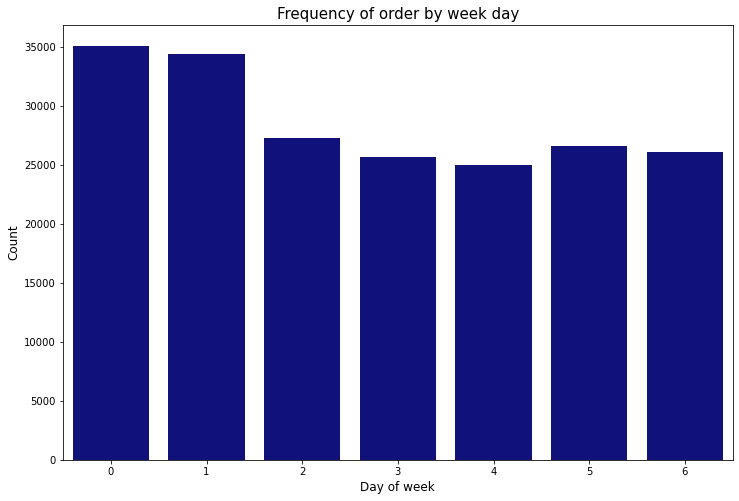

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color='darkblue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

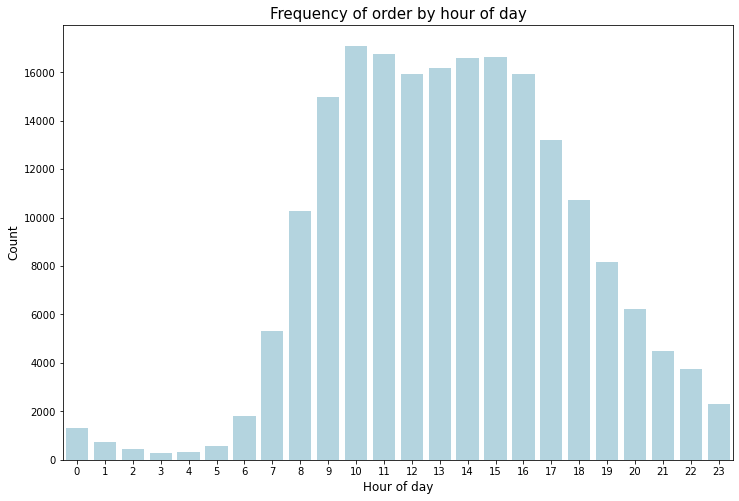

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders, color='lightblue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

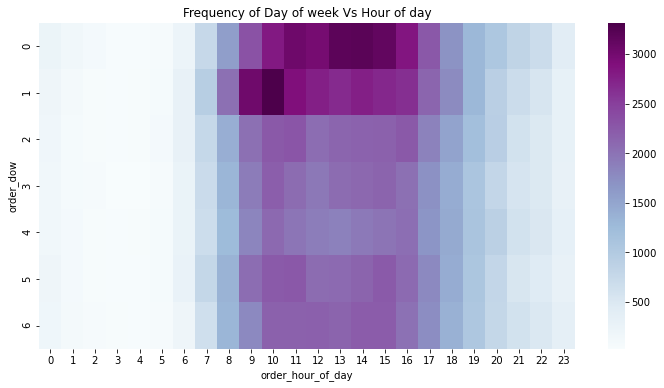

In [44]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="BuPu")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

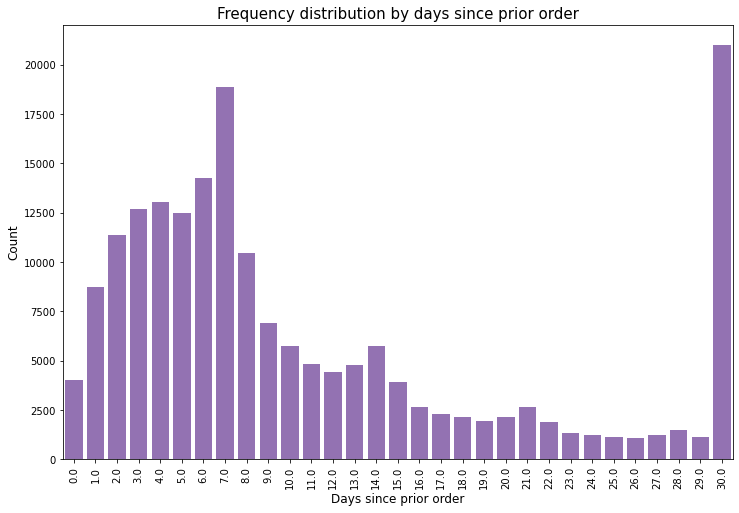

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color=sns.color_palette()[4])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

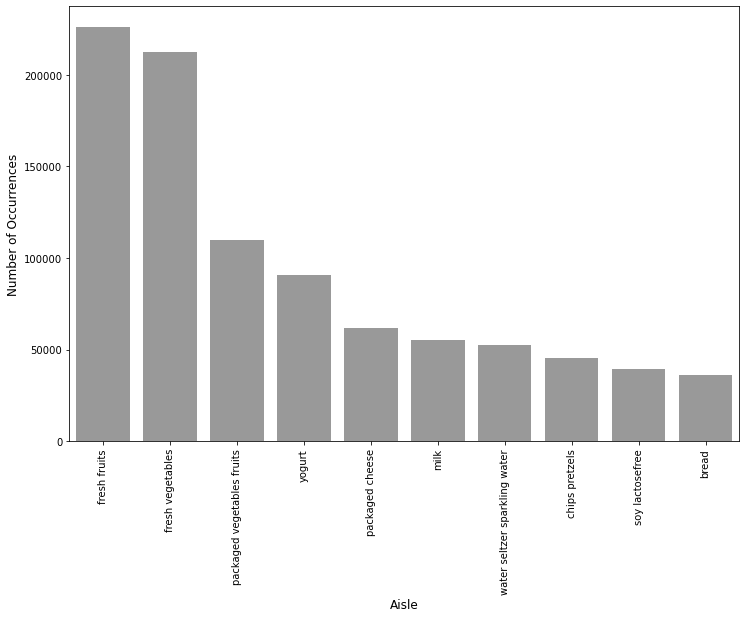

In [51]:
df['product_name'].value_counts()[:10]
cnt_srs = df['product_name'].value_counts()[:10]
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='gray')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### EXPLORE FREQUENT_ITEMSETS

In [26]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Length=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.2)]

,support,itemsets,length
75,0.317560,"(fresh vegetables, fresh fruits)",2
85,0.269870,"(packaged vegetables fruits, fresh fruits)",2
100,0.234555,"(fresh vegetables, packaged vegetables fruits)",2


In [27]:
# fresh fruits and yogurt
frequent_itemsets[ frequent_itemsets['itemsets'] == {'yogurt', 'fresh fruits'}]

,support,itemsets,length
91,0.188225,"(fresh fruits, yogurt)",2


In [29]:
# packaged cheese
frequent_itemsets[ frequent_itemsets['itemsets'] == {'packaged cheese'}]

,support,itemsets,length
34,0.230995,(packaged cheese),1


In [30]:
# High Confidence and high Lift - complementary products
rulesConfidence[(rulesConfidence['confidence'] >= 0.8) & (rulesConfidence['lift'] >= 1.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
65,"(fresh fruits, fresh herbs)",(fresh vegetables),0.070135,0.44436,0.061815,0.881372,1.983463,0.030650,4.683872
34,(fresh herbs),(fresh vegetables),0.093005,0.44436,0.078655,0.845707,1.903203,0.037327,3.601205


In [32]:
# High Confidence rules where "fresh vegetables" and "fresh fruits" are in the LHS
rulesConfidence[rulesConfidence['antecedents']=={'fresh vegetables', 'fresh fruits'}]  
# Because rules are a "frozenset" object, the order of items is not important

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
75,"(fresh vegetables, fresh fruits)",(packaged vegetables fruits),0.31756,0.365415,0.18658,0.587543,1.607877,0.070539,1.538546
